In [12]:
import pygame
import moviepy
import gymnasium as gym
import numpy as np
import seaborn
from tqdm import tqdm #progress bar


In [13]:
from collections import defaultdict
import matplotlib.pyplot as plt #drawing plots
from matplotlib.patches import Patch #draw shapes
from IPython.display import clear_output

In [14]:
env=gym.make("Taxi-v3",render_mode="rgb_array")

In [15]:
done=False
observation, info=env.reset()

In [16]:
action =env.action_space.sample()
observation,reward,terminated,truncated,info =env.step(action)

In [17]:
class TaxiAgent:
    def __init__(self, learning_rate:float,initial_epsilon:float,epsilon_decay:float,final_epsilon:float,discount_factor:float = 0.95):
        #Initialize RL agent with empty dictionary of state-action values, learning rate, epsilon.
        #discount_factor: the discount factor for computing the Q-value.
        self.q_values= defaultdict(lambda:np.zeros(env.action_space.n))
        self.lr=learning_rate
        self.discount_factor=discount_factor
        self.epsilon=initial_epsilon
        self.epsilon_decay=epsilon_decay
        self.final_epsilon=final_epsilon
        self.training_error=[]
    def get_action(self, obs)->int:
        if np.random.random()<self.epsilon:
            return env.action_space.sample()
        else:
            return int(np.argmax(self.q_values[obs]))
    def update(self, obs:int, action:int, reward:float, termianted:bool, next_obs:int)->int:
        future_q_value=0
        if not terminated:
            future_q_value=np.max(self.q_values[next_obs])
        temporal_difference= (reward+self.discount_factor*future_q_value-self.q_values[obs][action])
        self.q_values[obs][action]=self.q_values[obs][action]+self.lr*temporal_difference
        self.training_error.append(temporal_difference)
    def decay_epsilon(self):
        self.epsilon=max(self.final_epsilon, self.epsilon-self.epsilon_decay)


In [18]:
learning_rate=0.01
n_episodes=10000
start_epsilon=1.0
epsilon_decay= start_epsilon/(n_episodes/2)
final_epsilon=0.1

In [19]:
agent = TaxiAgent(
    learning_rate=learning_rate,
    initial_epsilon=start_epsilon,
    epsilon_decay=epsilon_decay,
    final_epsilon=final_epsilon
)

In [20]:
env=gym.wrappers.RecordEpisodeStatistics(env, deque_size=n_episodes)
env= gym.wrappers.RecordVideo(env, video_folder="taxi_agent", episode_trigger=lambda x: x%1000==0)



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/gymnasium/wrappers/record_video.py:94: UserWarning: WARN: Overwriting existing videos at /Users/lukehoward/Documents/GitHub/Reinforcement-Learning/Taxi/taxi_agent folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


  0%|          | 0/10000 [00:00<?, ?it/s]

Moviepy - Building video /Users/lukehoward/Documents/GitHub/Reinforcement-Learning/Taxi/taxi_agent/rl-video-episode-0.mp4.
Moviepy - Writing video /Users/lukehoward/Documents/GitHub/Reinforcement-Learning/Taxi/taxi_agent/rl-video-episode-0.mp4



  0%|          | 37/10000 [00:01<03:59, 41.55it/s] 

Moviepy - Done !
Moviepy - video ready /Users/lukehoward/Documents/GitHub/Reinforcement-Learning/Taxi/taxi_agent/rl-video-episode-0.mp4


 10%|▉         | 982/10000 [00:07<00:47, 188.10it/s]

Moviepy - Building video /Users/lukehoward/Documents/GitHub/Reinforcement-Learning/Taxi/taxi_agent/rl-video-episode-1000.mp4.
Moviepy - Writing video /Users/lukehoward/Documents/GitHub/Reinforcement-Learning/Taxi/taxi_agent/rl-video-episode-1000.mp4



 10%|█         | 1038/10000 [00:08<02:04, 71.99it/s]

Moviepy - Done !
Moviepy - video ready /Users/lukehoward/Documents/GitHub/Reinforcement-Learning/Taxi/taxi_agent/rl-video-episode-1000.mp4


 20%|█▉        | 1989/10000 [00:13<00:37, 213.23it/s]

Moviepy - Building video /Users/lukehoward/Documents/GitHub/Reinforcement-Learning/Taxi/taxi_agent/rl-video-episode-2000.mp4.
Moviepy - Writing video /Users/lukehoward/Documents/GitHub/Reinforcement-Learning/Taxi/taxi_agent/rl-video-episode-2000.mp4



 21%|██        | 2058/10000 [00:14<01:29, 88.56it/s] 

Moviepy - Done !
Moviepy - video ready /Users/lukehoward/Documents/GitHub/Reinforcement-Learning/Taxi/taxi_agent/rl-video-episode-2000.mp4


 30%|███       | 3000/10000 [00:18<00:28, 249.00it/s]

Moviepy - Building video /Users/lukehoward/Documents/GitHub/Reinforcement-Learning/Taxi/taxi_agent/rl-video-episode-3000.mp4.
Moviepy - Writing video /Users/lukehoward/Documents/GitHub/Reinforcement-Learning/Taxi/taxi_agent/rl-video-episode-3000.mp4



 31%|███       | 3051/10000 [00:19<01:16, 90.65it/s] 

Moviepy - Done !
Moviepy - video ready /Users/lukehoward/Documents/GitHub/Reinforcement-Learning/Taxi/taxi_agent/rl-video-episode-3000.mp4


 40%|████      | 4000/10000 [00:22<00:17, 344.53it/s]

Moviepy - Building video /Users/lukehoward/Documents/GitHub/Reinforcement-Learning/Taxi/taxi_agent/rl-video-episode-4000.mp4.
Moviepy - Writing video /Users/lukehoward/Documents/GitHub/Reinforcement-Learning/Taxi/taxi_agent/rl-video-episode-4000.mp4



 40%|████      | 4000/10000 [00:23<00:17, 344.53it/s]

Moviepy - Done !
Moviepy - video ready /Users/lukehoward/Documents/GitHub/Reinforcement-Learning/Taxi/taxi_agent/rl-video-episode-4000.mp4


 50%|████▉     | 4975/10000 [00:25<00:11, 456.37it/s]

Moviepy - Building video /Users/lukehoward/Documents/GitHub/Reinforcement-Learning/Taxi/taxi_agent/rl-video-episode-5000.mp4.
Moviepy - Writing video /Users/lukehoward/Documents/GitHub/Reinforcement-Learning/Taxi/taxi_agent/rl-video-episode-5000.mp4



 50%|█████     | 5021/10000 [00:25<00:15, 326.63it/s]

Moviepy - Done !
Moviepy - video ready /Users/lukehoward/Documents/GitHub/Reinforcement-Learning/Taxi/taxi_agent/rl-video-episode-5000.mp4


 60%|█████▉    | 5968/10000 [00:27<00:06, 638.02it/s]

Moviepy - Building video /Users/lukehoward/Documents/GitHub/Reinforcement-Learning/Taxi/taxi_agent/rl-video-episode-6000.mp4.
Moviepy - Writing video /Users/lukehoward/Documents/GitHub/Reinforcement-Learning/Taxi/taxi_agent/rl-video-episode-6000.mp4



 61%|██████    | 6091/10000 [00:27<00:10, 382.08it/s]

Moviepy - Done !
Moviepy - video ready /Users/lukehoward/Documents/GitHub/Reinforcement-Learning/Taxi/taxi_agent/rl-video-episode-6000.mp4


 70%|██████▉   | 6985/10000 [00:29<00:03, 798.73it/s]

Moviepy - Building video /Users/lukehoward/Documents/GitHub/Reinforcement-Learning/Taxi/taxi_agent/rl-video-episode-7000.mp4.
Moviepy - Writing video /Users/lukehoward/Documents/GitHub/Reinforcement-Learning/Taxi/taxi_agent/rl-video-episode-7000.mp4



 70%|██████▉   | 6985/10000 [00:29<00:03, 798.73it/s]

Moviepy - Done !
Moviepy - video ready /Users/lukehoward/Documents/GitHub/Reinforcement-Learning/Taxi/taxi_agent/rl-video-episode-7000.mp4


 79%|███████▉  | 7919/10000 [00:30<00:02, 927.31it/s]

Moviepy - Building video /Users/lukehoward/Documents/GitHub/Reinforcement-Learning/Taxi/taxi_agent/rl-video-episode-8000.mp4.
Moviepy - Writing video /Users/lukehoward/Documents/GitHub/Reinforcement-Learning/Taxi/taxi_agent/rl-video-episode-8000.mp4



 81%|████████  | 8121/10000 [00:30<00:02, 739.13it/s]

Moviepy - Done !
Moviepy - video ready /Users/lukehoward/Documents/GitHub/Reinforcement-Learning/Taxi/taxi_agent/rl-video-episode-8000.mp4


 89%|████████▉ | 8885/10000 [00:31<00:00, 1246.34it/s]

Moviepy - Building video /Users/lukehoward/Documents/GitHub/Reinforcement-Learning/Taxi/taxi_agent/rl-video-episode-9000.mp4.
Moviepy - Writing video /Users/lukehoward/Documents/GitHub/Reinforcement-Learning/Taxi/taxi_agent/rl-video-episode-9000.mp4



 90%|█████████ | 9014/10000 [00:31<00:01, 871.73it/s] 

Moviepy - Done !
Moviepy - video ready /Users/lukehoward/Documents/GitHub/Reinforcement-Learning/Taxi/taxi_agent/rl-video-episode-9000.mp4


100%|██████████| 10000/10000 [00:32<00:00, 308.04it/s]


Moviepy - Building video /Users/lukehoward/Documents/GitHub/Reinforcement-Learning/Taxi/taxi_agent/rl-video-episode-10000.mp4.
Moviepy - Writing video /Users/lukehoward/Documents/GitHub/Reinforcement-Learning/Taxi/taxi_agent/rl-video-episode-10000.mp4



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.return_queue to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.return_queue` for environment variables or `env.get_wrapper_attr('return_queue')` that will search the reminding wrappers.
  logger.warn(


Moviepy - Done !
Moviepy - video ready /Users/lukehoward/Documents/GitHub/Reinforcement-Learning/Taxi/taxi_agent/rl-video-episode-10000.mp4


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.length_queue to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.length_queue` for environment variables or `env.get_wrapper_attr('length_queue')` that will search the reminding wrappers.
  logger.warn(


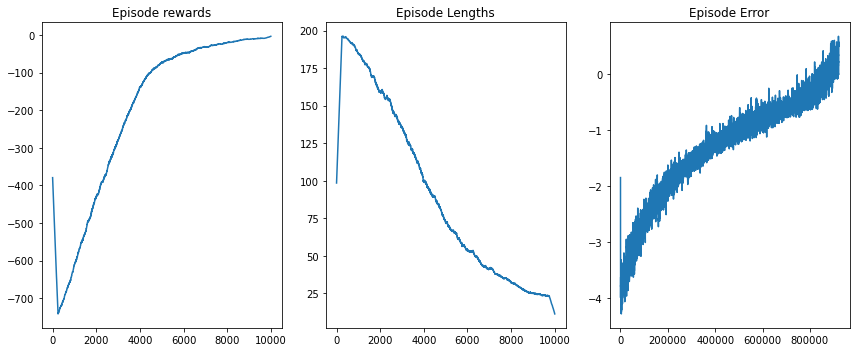

In [21]:
for episode in tqdm(range(n_episodes)):
    obs, info = env.reset()
    done = False

    while not done:
        action = int(agent.get_action(obs))
        next_obs, reward, terminated, truncated, infos = env.step(action)

        agent.update(obs, action, reward, terminated, next_obs)

        done = terminated or truncated
        obs = next_obs

    agent.decay_epsilon()
env.close()

rolling_length=500
fig, axs= plt.subplots(ncols=3, figsize=(12,5))
axs[0].set_title("Episode rewards")
reward_moving_average=(np.convolve(np.array(env.return_queue).flatten(), np.ones(rolling_length), mode="same")/rolling_length)
axs[0].plot(range(len(reward_moving_average)), reward_moving_average)
axs[1].set_title("Episode Lengths")
length_moving_average=(np.convolve(np.array(env.length_queue).flatten(), np.ones(rolling_length), mode="same")/rolling_length)
axs[1].plot(range(len(length_moving_average)),length_moving_average)
training_error_moving_average=(np.convolve(np.array(agent.training_error).flatten(), np.ones(rolling_length), mode="same")/rolling_length)
axs[2].plot(range(len(training_error_moving_average)), training_error_moving_average)
axs[2].set_title("Episode Error")
plt.tight_layout()
plt.show()